# Simple Classifier

## Import data

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [5]:
texts = twenty_train.data
classes = twenty_train.target

In [3]:
print('data length: ', + len(twenty_train.data))
print('targets length: ', + len(twenty_train.target))

data length:  11314
targets length:  11314


In [3]:
# 20 different classifications
set(twenty_train.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [4]:
# what are these targets?
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
twenty_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

## Prep

In [6]:
import re

body_re_lines = re.compile(r".*(?:Lines:\s+\d+)(.*)", re.MULTILINE)
body_re_org = re.compile(r".*(?:Organization:\s)(.*)", re.MULTILINE)

def extract_body(x):
    x_prime = ' '.join(x.split("\n"))
    test_match = body_re_lines.match(x_prime)
    if test_match == None:
        # There's no 'lines' object, return the whole thing
        return body_re_org.match(x_prime).group(1)
    return test_match.group(1)

In [7]:
train_bodies = [extract_body(post) for post in twenty_train.data]
test_bodies = [extract_body(post) for post in twenty_test.data]

In [8]:
train_bodies[0]

'   I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is  all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail.  Thanks, - IL    ---- brought to you by your neighborhood Lerxst ----     '

In [9]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sam.close@ibm.com/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [11]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [12]:
hyph_re = re.compile(r"-")
punct_re = re.compile(r"[^a-z\s]")
mult_whitespace_re = re.compile(r"[\s]{2,}")

train_bodies = [body.lower() for body in train_bodies]
train_bodies = [hyph_re.sub(" ", body) for body in train_bodies]
train_bodies = [punct_re.sub("", body) for body in train_bodies]
train_bodies = [mult_whitespace_re.sub(" ", body) for body in train_bodies]
train_bodies = [remove_stop_words(body) for body in train_bodies]

test_bodies = [body.lower() for body in test_bodies]
test_bodies = [hyph_re.sub(" ", body) for body in test_bodies]
test_bodies = [punct_re.sub("", body) for body in test_bodies]
test_bodies = [mult_whitespace_re.sub(" ", body) for body in test_bodies]
test_bodies = [remove_stop_words(body) for body in test_bodies]

In [13]:
train_bodies[0]

'wondering anyone could enlighten car saw day door sports car looked late early called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst'

In [14]:
import numpy as np

print("documents in dataset: %d" % len(train_bodies))
num_words = [len(doc.split()) for doc in train_bodies]
print("mean words per document: %f" % np.mean(num_words,axis=0))

documents in dataset: 11314
mean words per document: 142.854251


In [15]:
# targets currently as list of numbers
print('Max category value:', twenty_train.target.max())
print('Min category value:', twenty_train.target.min())
print('First 10 values:', twenty_train.target[0:9])
print('Length of category values:', len(twenty_train.target))

Max category value: 19
Min category value: 0
First 10 values: [ 7  4  4  1 14 16 13  3  2]
Length of category values: 11314


## Classification Model

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 3), 
                             stop_words='english',
                             binary=True)


In [25]:
# Use `fit` to learn the vocabulary of the bodies
vectorizer.fit(train_bodies)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [26]:
feature_names = vectorizer.get_feature_names()

In [27]:
# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(train_bodies).toarray()

y = twenty_train.target

In [28]:
print(X.shape)
print(y.shape)

(11314, 1000)
(11314,)


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)

model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
X_test = vectorizer.transform(test_bodies).toarray()

predictions = model.predict(X_test)

correct = (predictions == twenty_test.target)

accuracy = sum(correct)/ len(correct)

accuracy

0.5301380775358471

In [31]:
feature_importances = pd.DataFrame({'Feature Name': feature_names, 'Importance Score': model.feature_importances_ })

feature_importances.sort_values(by=['Importance Score'], ascending=False).head(10)

,Feature Name,Importance Score
235,dod,0.014461
964,windows,0.012165
79,bike,0.011910
111,car,0.011353
819,space,0.008530
152,clipper,0.008199
343,god,0.007212
757,sale,0.006930
866,team,0.006718
66,baseball,0.006516


## Visualisation

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

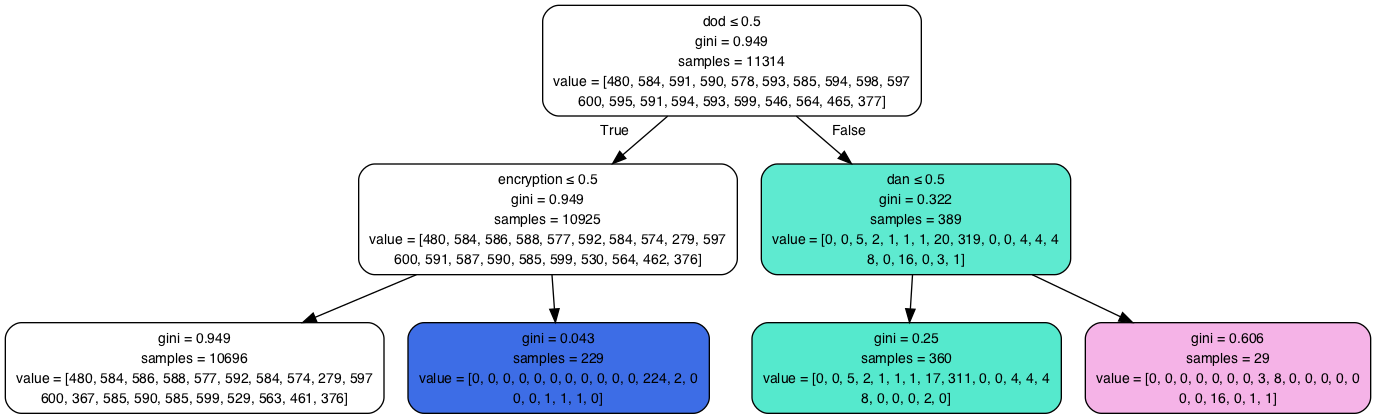

In [34]:
# # REQUIREMENTS:
!pip install pydotplus
!pip install graphviz

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

model.fit(X, y)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

def build_tree_image(model,dot_data, feature_names):
    export_graphviz(model, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True,
                feature_names = feature_names)  

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return graph

graph = build_tree_image(model, dot_data, feature_names)

Image(graph.create_png())